<a href="https://colab.research.google.com/github/MarioTiara/COVID-19/blob/master/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MarioTiara/COVID-19.git

Cloning into 'COVID-19'...
Checking out files: 100% (648/648), done.


In [0]:
import os
os.chdir('/content/COVID-19/DATA_X_RAY/')

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
IMG_DIM = (299, 299)
train_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/TRAIN/*')
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in train_files]

validation_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/VAL2/*')
validation_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in validation_files]

In [8]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (142, 299, 299, 3) 	Validation dataset shape: (40, 299, 299, 3)


In [9]:
print (train_labels)

['NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORM

In [10]:
print (validation_labels)

['NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19']


(299, 299, 3)


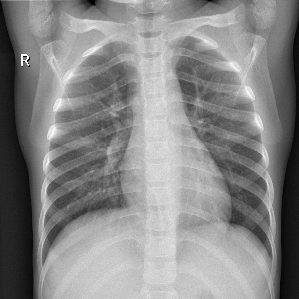

In [12]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
tf.keras.preprocessing.image.array_to_img(train_imgs[0])

In [13]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[70:80], train_labels_enc[70:80])

['COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19'] [0 0 1 1 1 1 1 0 1 0]
